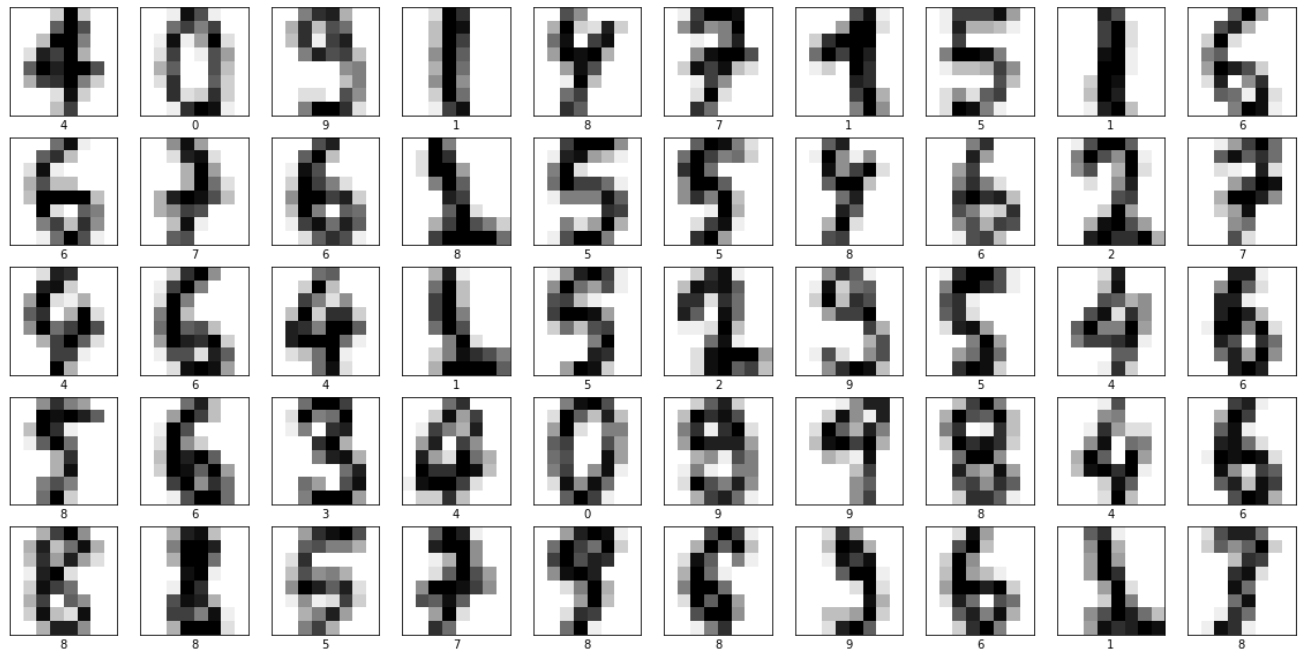

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import cluster
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_digits
data, labels = load_digits(return_X_y=True)

In [3]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
labels[0]

0

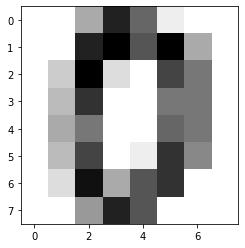

In [5]:
b=data[0]
a= b.reshape(8,8)
plt.imshow(a, cmap="binary")

In [6]:
digits=np.unique(labels)
digits

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
n_samples, n_features = data.shape
n_samples, n_features

(1797, 64)

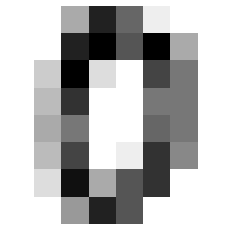

In [8]:
first_digit=data[0]
first_digit_image= first_digit.reshape(8,8)
plt.imshow(first_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [9]:
labels[0]

0

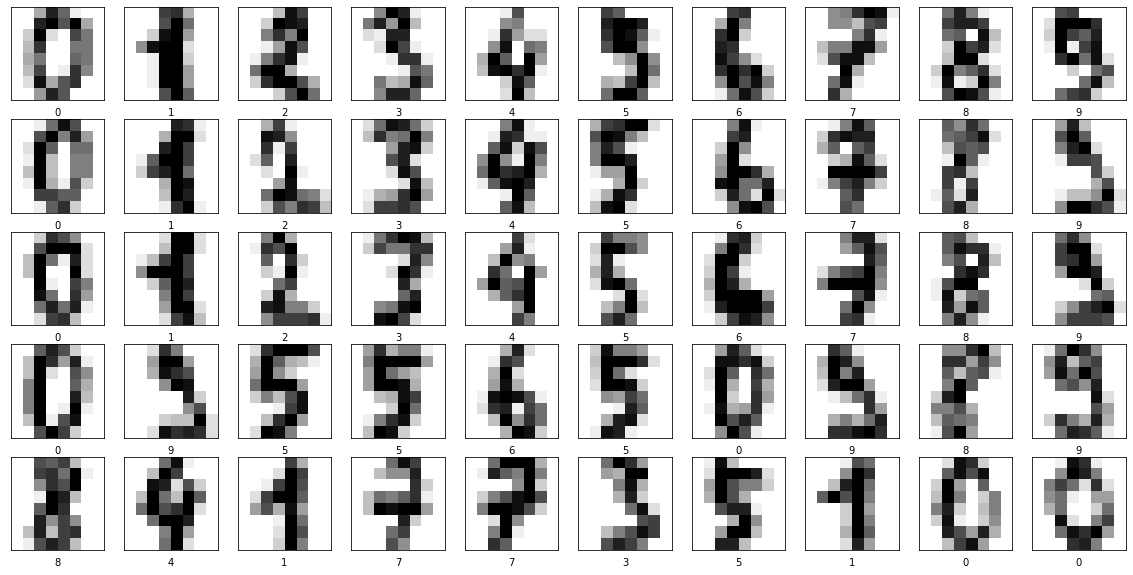

In [10]:
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    x=data[i].reshape(8,8)
    plt.imshow(x, cmap=plt.cm.binary)
    plt.xlabel(labels[i])
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=0.8, random_state=2)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [13]:
unique,count=np.unique(y_test,return_counts=True)
unique,count/y_test.shape

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0.08888889, 0.12222222, 0.08611111, 0.1       , 0.09722222,
        0.11944444, 0.09722222, 0.11111111, 0.1       , 0.07777778]))

In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [15]:
#x_train, y_train = smote.fit_resample(X_train.astype('float'),y_train)

In [16]:
#unique,count = np.unique(y_train,return_counts=True)
#unique,count/y_train.shape

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [18]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [19]:
log_reg.intercept_

array([ 0.00032198, -0.07937238, -0.00385451,  0.01053846,  0.00497534,
       -0.00169985, -0.00646291,  0.0135647 ,  0.09386533, -0.03187616])

In [20]:
log_reg.coef_[:1]

array([[ 0.00000000e+00, -8.15705766e-03, -2.32205836e-02,
         4.61992144e-02,  2.20580221e-02, -9.17586844e-02,
        -1.35182879e-01, -1.25730676e-02, -1.33547647e-04,
        -2.76676448e-02,  1.32057172e-02,  8.80933587e-02,
         4.58700949e-02,  1.25854630e-01, -5.14246170e-02,
        -1.36075029e-02, -3.68904186e-04,  1.51055813e-02,
         1.68600194e-01,  3.08444242e-03, -2.76660795e-01,
         1.34407265e-01,  8.32086378e-02, -4.42461295e-03,
        -1.77917038e-04,  9.16759492e-02,  1.50048819e-01,
        -1.39245474e-01, -4.38755662e-01, -2.01798036e-02,
         1.85175261e-01, -9.23918256e-05,  0.00000000e+00,
         1.81283421e-01,  1.06883578e-01, -2.44530303e-01,
        -3.99549904e-01,  3.30743059e-02,  1.29451516e-01,
         0.00000000e+00, -3.41447798e-04,  2.35667731e-02,
         1.77988133e-01, -6.96931855e-02, -1.35088531e-01,
         1.38911449e-01,  3.90999609e-02, -4.18488588e-04,
        -6.90084203e-04, -5.73505700e-02,  9.71085744e-0

In [21]:
y_predict=log_reg.predict(X_test)
y_predict[:1]

array([4])

In [22]:
log_reg.score(X_test, y_test)

0.9444444444444444

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9444444444444444

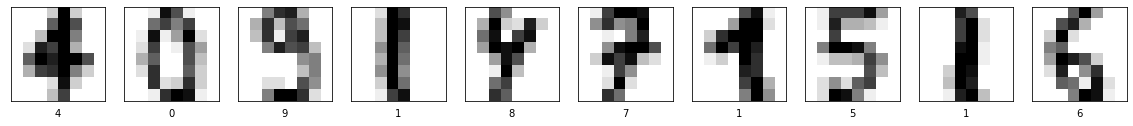

In [24]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(3,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    x=X_test[i].reshape(8,8)
    plt.imshow(x, cmap=plt.cm.binary)
    plt.xlabel(y_predict[i])
plt.show()

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.95      0.93      0.94        44
           2       1.00      1.00      1.00        31
           3       0.94      0.92      0.93        36
           4       0.94      0.89      0.91        35
           5       0.98      0.95      0.96        43
           6       1.00      0.94      0.97        35
           7       0.97      0.97      0.97        40
           8       0.81      0.97      0.89        36
           9       0.86      0.89      0.88        28

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.95      0.94      0.95       360



In [26]:
from sklearn.preprocessing import QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=2)

In [27]:
X_train_trans = quantile_transformer.fit_transform(X_train)

In [28]:
X_test_trans = quantile_transformer.transform(X_test)

In [29]:
lreg = LogisticRegression()

In [30]:
lreg.fit(X_train_trans,y_train)

LogisticRegression()

In [31]:
lreg.score(X_test, y_test)

0.8472222222222222

In [32]:
y_pred=lreg.predict(X_test_trans)

In [33]:
accuracy_score(y_test, y_pred)

0.9333333333333333

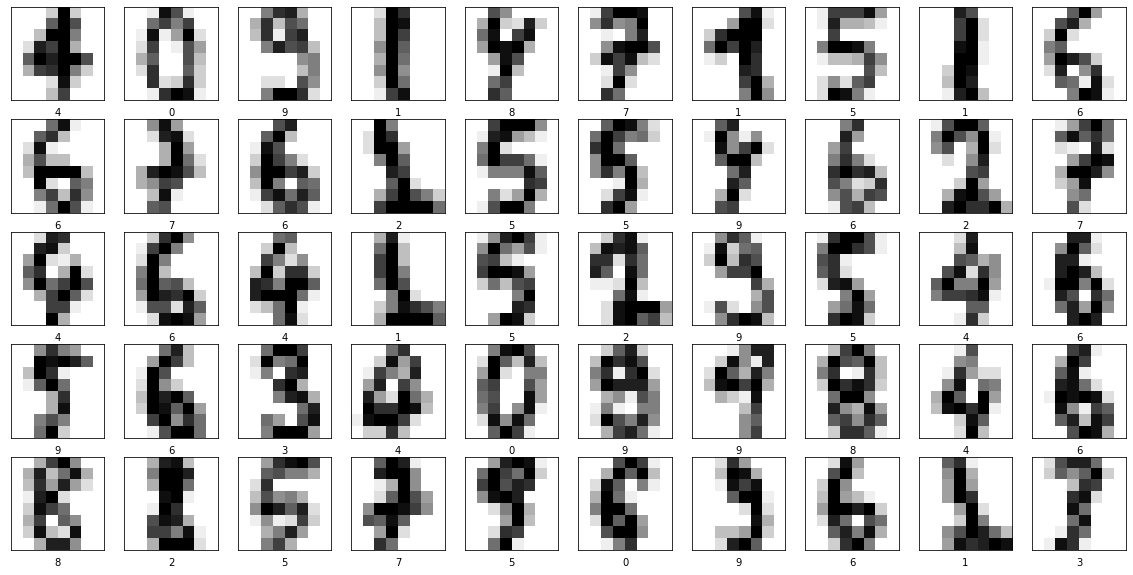

In [34]:
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    x=X_test[i].reshape(8,8)
    plt.imshow(x, cmap=plt.cm.binary)
    plt.xlabel(y_pred[i])
plt.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.98      0.93      0.95        44
           2       0.91      1.00      0.95        31
           3       0.94      0.89      0.91        36
           4       0.94      0.89      0.91        35
           5       0.93      0.95      0.94        43
           6       1.00      0.94      0.97        35
           7       0.97      0.97      0.97        40
           8       0.85      0.92      0.88        36
           9       0.83      0.86      0.84        28

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.94      0.93      0.93       360



In [36]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer().fit(X_train)  # fit does nothing
normalizer

Normalizer()

In [37]:
X_train_normalized = normalizer.transform(X_train)
X_test_normalized = normalizer.transform(X_test)
X_train_normalized

array([[0.        , 0.        , 0.16224277, ..., 0.25958843, 0.12979422,
        0.        ],
       [0.        , 0.01663666, 0.19963986, ..., 0.1497299 , 0.06654662,
        0.        ],
       [0.        , 0.0625229 , 0.2500916 , ..., 0.2500916 , 0.1250458 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.20416196, 0.05444319,
        0.        ],
       [0.        , 0.        , 0.10519842, ..., 0.28052912, 0.28052912,
        0.21039684],
       [0.        , 0.05035088, 0.23497078, ..., 0.        , 0.        ,
        0.        ]])

In [38]:
lreg=LogisticRegression()
lreg.fit(X_train_normalized, y_train)

LogisticRegression()

In [39]:
lreg.score(X_test, y_test)

0.8444444444444444

In [40]:
y_pred=lreg.predict(X_test)

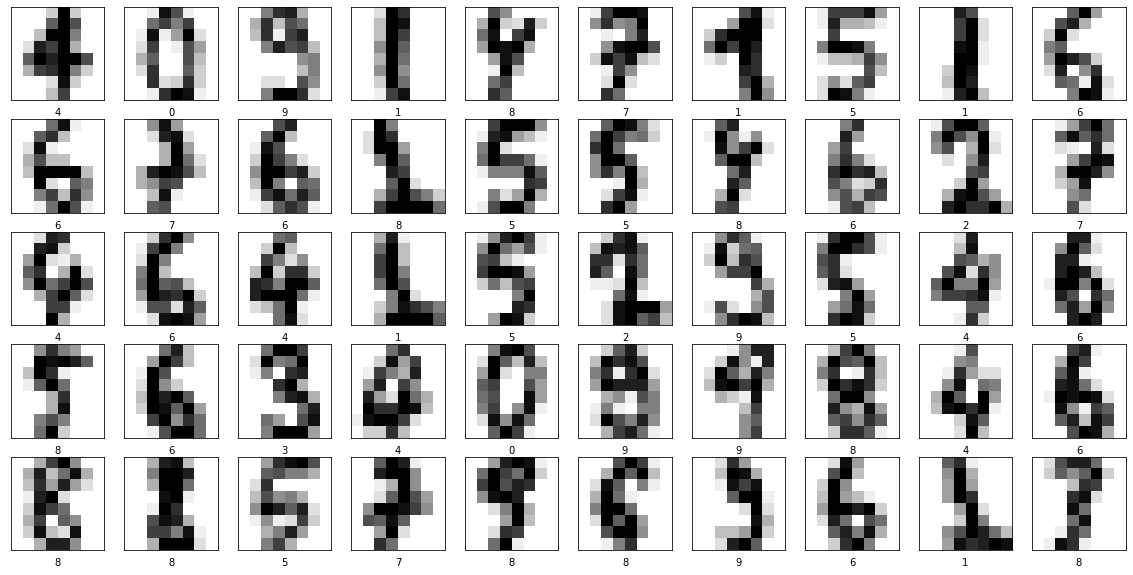

In [41]:
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    x=X_test[i].reshape(8,8)
    plt.imshow(x, cmap=plt.cm.binary)
    plt.xlabel(y_pred[i])
plt.show()

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.96      0.61      0.75        44
           2       1.00      0.81      0.89        31
           3       0.94      0.81      0.87        36
           4       0.97      0.83      0.89        35
           5       1.00      0.86      0.92        43
           6       0.92      0.94      0.93        35
           7       1.00      0.88      0.93        40
           8       0.45      0.97      0.61        36
           9       0.79      0.79      0.79        28

    accuracy                           0.84       360
   macro avg       0.90      0.85      0.86       360
weighted avg       0.91      0.84      0.86       360



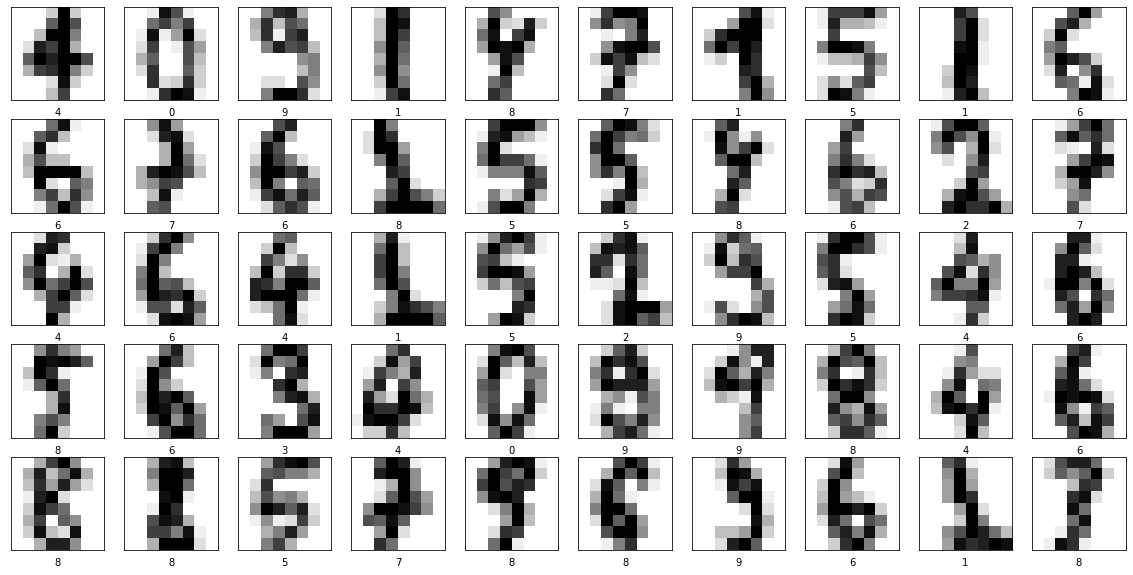

In [43]:
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    x=X_test[i].reshape(8,8)
    plt.imshow(x, cmap=plt.cm.binary)
    plt.xlabel(y_pred[i])
plt.show()

* **Without Normalization giving better accuracy**

In [44]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

pipeline =Pipeline([
    ('kmeans', KMeans(n_clusters = 50)),
    ('log_red', LogisticRegression()),
])

In [45]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_red', LogisticRegression())])

In [46]:
pipeline.score(X_test, y_test)

0.95

In [47]:
y_pred=pipeline.predict(X_test)
y_pred

array([4, 0, 9, 1, 9, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 8, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 2, 5, 7,
       9, 4, 9, 6, 1, 7, 0, 1, 9, 7, 3, 3, 1, 8, 8, 8, 9, 8, 5, 8, 4, 8,
       3, 5, 8, 4, 3, 9, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4,
       6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 1, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9,
       4, 7, 0, 3, 5, 8, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 5, 1,
       0, 3, 4, 3, 0, 9, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8,
       2, 1, 8, 4, 1, 3, 1, 1, 9, 5, 4, 8, 7, 4, 8, 9, 5, 7, 6, 9, 4, 0,
       4, 0, 0, 9, 0, 6, 5, 8, 8, 3, 7, 9, 2, 0, 3, 2, 7, 3, 0, 2, 6, 9,
       2, 7, 0, 6, 9, 3, 1, 1, 3, 5, 2, 3, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5,
       9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2,
       8, 7, 3, 7, 8, 0, 9, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2,
       5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 8, 5, 5, 5, 4, 0, 1, 8, 6,
       2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 8, 6, 9,

In [48]:
accuracy_score(y_test, y_pred)

0.95

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.98      0.93      0.95        44
           2       0.97      1.00      0.98        31
           3       0.97      0.97      0.97        36
           4       0.91      0.89      0.90        35
           5       0.98      0.95      0.96        43
           6       0.97      0.94      0.96        35
           7       0.97      0.95      0.96        40
           8       0.88      0.97      0.92        36
           9       0.87      0.93      0.90        28

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



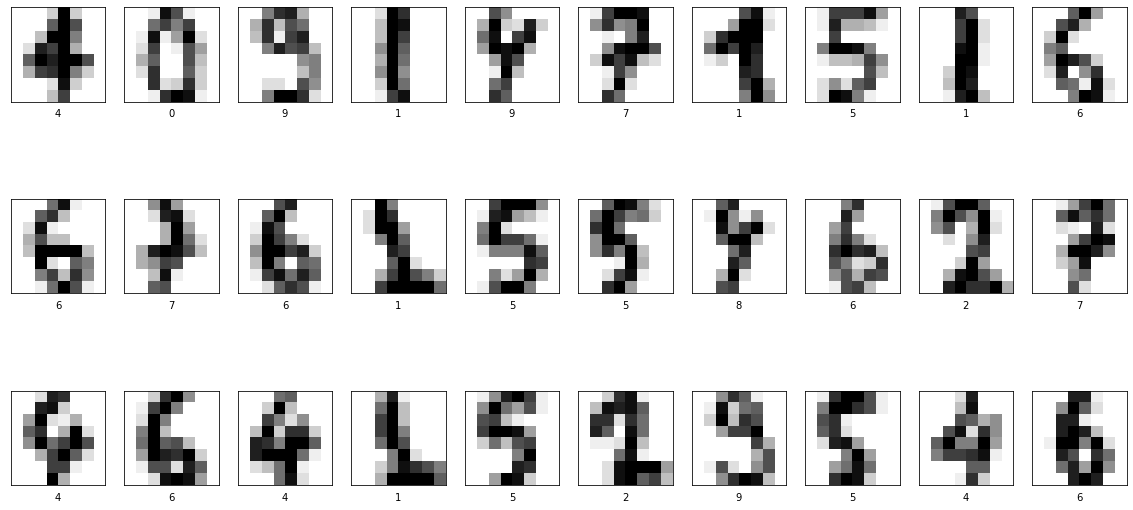

In [50]:
plt.figure(figsize=(20,10))
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    x=X_test[i].reshape(8,8)
    plt.imshow(x, cmap=plt.cm.binary)
    plt.xlabel(y_pred[i])
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................kmeans_

[CV] END ..............................kmeans__n_clusters=35; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=36; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=36; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=36; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=37; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=37; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=37; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=38; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=38; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=38; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=39; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=39; total time=   0.2s
[CV] END ...................

[CV] END ..............................kmeans__n_clusters=69; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=70; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=70; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=70; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=71; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=71; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=71; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=72; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=72; total time=   0.5s
[CV] END ..............................kmeans__n_clusters=72; total time=   0.5s
[CV] END ..............................kmeans__n_clusters=73; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=73; total time=   0.4s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_red', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [52]:
grid_clf.best_params_

{'kmeans__n_clusters': 31}

In [53]:
grid_clf.score(X_test, y_test)

0.9472222222222222

In [54]:
y_pred = grid_clf.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.95      0.93      0.94        44
           2       1.00      1.00      1.00        31
           3       0.95      0.97      0.96        36
           4       0.91      0.89      0.90        35
           5       0.98      0.95      0.96        43
           6       0.97      0.94      0.96        35
           7       0.97      0.95      0.96        40
           8       0.89      0.94      0.92        36
           9       0.84      0.93      0.88        28

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



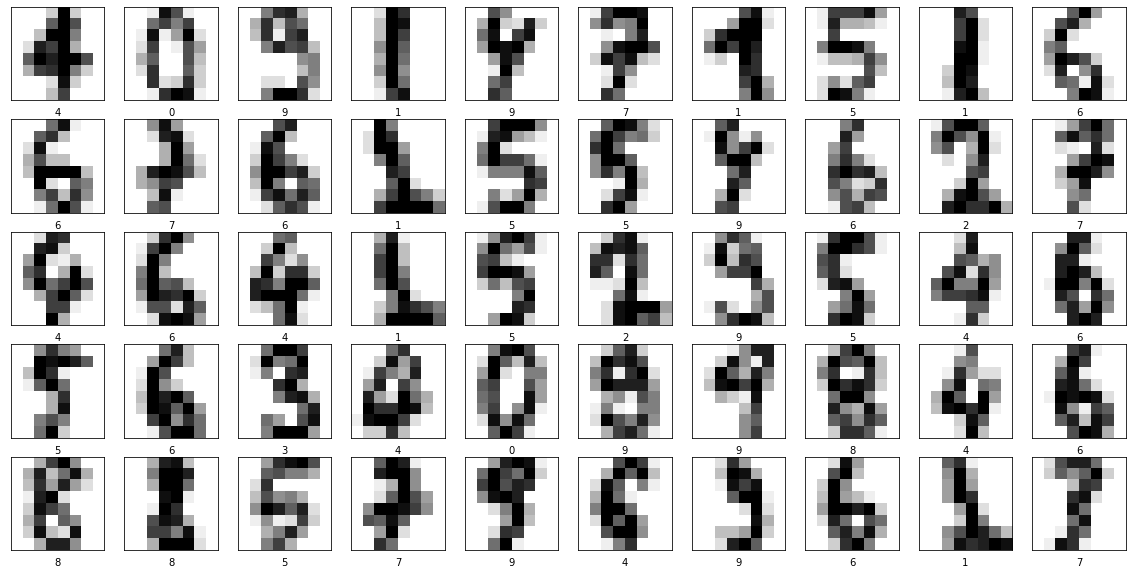

In [56]:
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    x=X_test[i].reshape(8,8)
    plt.imshow(x, cmap=plt.cm.binary)
    plt.xlabel(y_pred[i])
plt.show()

In [57]:
conf_matrix = pd.crosstab(y_test, y_pred)
conf_matrix

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,31,0,0,0,1,0,0,0,0,0
1,0,41,0,0,0,0,1,0,2,0
2,0,0,31,0,0,0,0,0,0,0
3,0,0,0,35,0,0,0,1,0,0
4,0,0,0,0,31,0,0,0,0,4
5,0,0,0,0,1,41,0,0,0,1
6,0,1,0,0,1,0,33,0,0,0
7,0,0,0,1,0,0,0,38,1,0
8,0,1,0,1,0,0,0,0,34,0


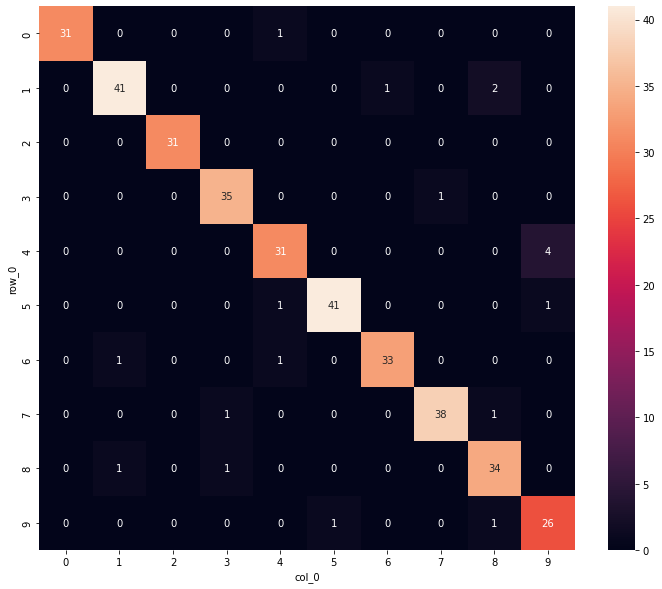

In [58]:
plt.figure(figsize=(12,10))
sns.heatmap(conf_matrix, annot=True, fmt ='')
plt.show()